# Assignment 16
30 min: Train a decision tree to predict one of the categorical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [47]:
import pandas as pd
import numpy as np

pokémon = pd.read_csv('pokemon.csv', sep=',')
pokémon = pokémon.dropna() #Deze is erg belangrijk omdat je alle rijen waar een lege waarde in zit wilt verwijderen.

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

from sklearn.model_selection import train_test_split

pokémon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False


### Split the penguin dataset into a train (70%) and test (30%) set.

In [48]:
train, test = train_test_split(pokémon, test_size=0.3, random_state=42, stratify=pokémon['Type 1'])
print(train.shape, test.shape)

(289, 13) (125, 13)


### Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree.

In [49]:
features = [ 'Attack', 'Defense', 'HP']
dt_classification = DecisionTreeClassifier(max_depth=10)
dt_classification.fit(train[features], train['Type 1'])

DecisionTreeClassifier(max_depth=10)

### Use your decision tree model to make predictions for both the train and test set.

In [50]:
predictions = dt_classification.predict(pokémon[features])
predictions

array(['Dark', 'Dark', 'Grass', 'Grass', 'Normal', 'Rock', 'Fire', 'Bug',
       'Bug', 'Bug', 'Bug', 'Bug', 'Water', 'Electric', 'Normal',
       'Normal', 'Normal', 'Grass', 'Dark', 'Poison', 'Normal', 'Normal',
       'Water', 'Dark', 'Dark', 'Fighting', 'Grass', 'Bug', 'Bug', 'Dark',
       'Bug', 'Water', 'Ground', 'Grass', 'Poison', 'Water', 'Water',
       'Rock', 'Bug', 'Steel', 'Water', 'Water', 'Water', 'Psychic',
       'Bug', 'Dark', 'Normal', 'Grass', 'Water', 'Water', 'Ghost',
       'Dark', 'Dark', 'Bug', 'Rock', 'Bug', 'Electric', 'Fairy', 'Steel',
       'Bug', 'Psychic', 'Bug', 'Ice', 'Steel', 'Water', 'Water', 'Water',
       'Rock', 'Rock', 'Rock', 'Rock', 'Poison', 'Rock', 'Water',
       'Electric', 'Fire', 'Dragon', 'Psychic', 'Normal', 'Normal', 'Bug',
       'Bug', 'Bug', 'Ice', 'Dragon', 'Water', 'Water', 'Normal', 'Steel',
       'Bug', 'Grass', 'Electric', 'Water', 'Water', 'Grass', 'Water',
       'Grass', 'Bug', 'Water', 'Water', 'Dark', 'Water', 'Normal',

### Calculate the accuracy for both the train set predictions and test set predictions.

In [51]:
predictionsOnTrainset = dt_classification.predict(train[features])
predictionsOnTestset = dt_classification.predict(test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, train['Type 1'])
accuracyTest = calculate_accuracy(predictionsOnTestset, test['Type 1'])

print("Accuracy on train set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on train set 0.8373702422145328
Accuracy on test set 0.152


### Is the accurracy different? Did you expect this difference?

Het verschil tussen de train en de test set is zoals hierboven te zien erg groot. Dat had ik ook wel verwacht want de pokémon zijn super verschillend in Attack, Defence en HP dus de 30 procent is heel anders dan de 70.

### Use the plot_tree_classification function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

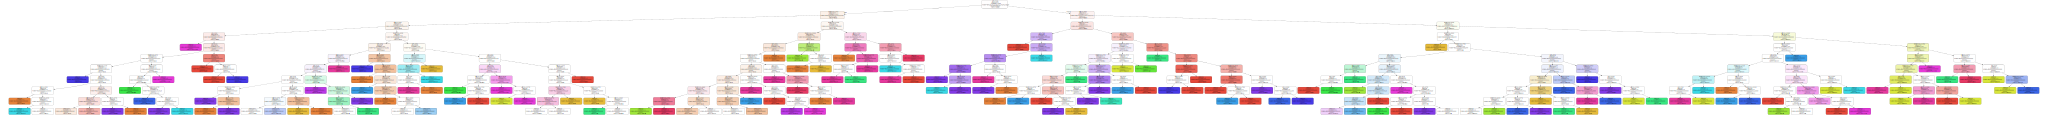

In [52]:
plot_tree_classification(dt_classification, features, np.sort(pokémon['Type 1'].unique()))